## Importing Data and Necessary Packages

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.metrics import classification_report, accuracy_score

In [6]:
data = pd.read_csv("/workspaces/ML_Lab/Data/diabetis_use.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1


## Pre-Processing Data

### Summary of the available data

In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             765 non-null    float64
 4   Insulin                   764 non-null    float64
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [9]:
print(data.isnull().sum())

Pregnancies                 5
Glucose                     0
BloodPressure               5
SkinThickness               3
Insulin                     4
BMI                         5
DiabetesPedigreeFunction    0
Age                         6
Outcome                     0
dtype: int64


#### Clearly we have some null values in Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, Age columns

##### We are omitting all entries where Age is null, as we can't approximate that value from a mean/median extracted from a distribution plot

In [10]:
data_copy = data.copy(deep = True)
data_copy = data_copy[data_copy["Age"].notnull()]
print("Original Dataset : {} ; After removing null age rows : {}".format(data.shape, data_copy.shape))

Original Dataset : (768, 9) ; After removing null age rows : (762, 9)


##### Now, out of the remaining columns, it is clear that the following columns should not have a zero value: -

*   BloodPressure
*   SkinThickness
*   Insulin
*   Glucose  
*   BMI

To make handling those values easier, let's replace all instances of "0" with NaN in those columns


In [11]:
data_copy[["BloodPressure","SkinThickness","Insulin","Glucose","BMI"]] = data_copy[["BloodPressure","SkinThickness","Insulin","Glucose","BMI"]].replace(0,np.NaN)

data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0


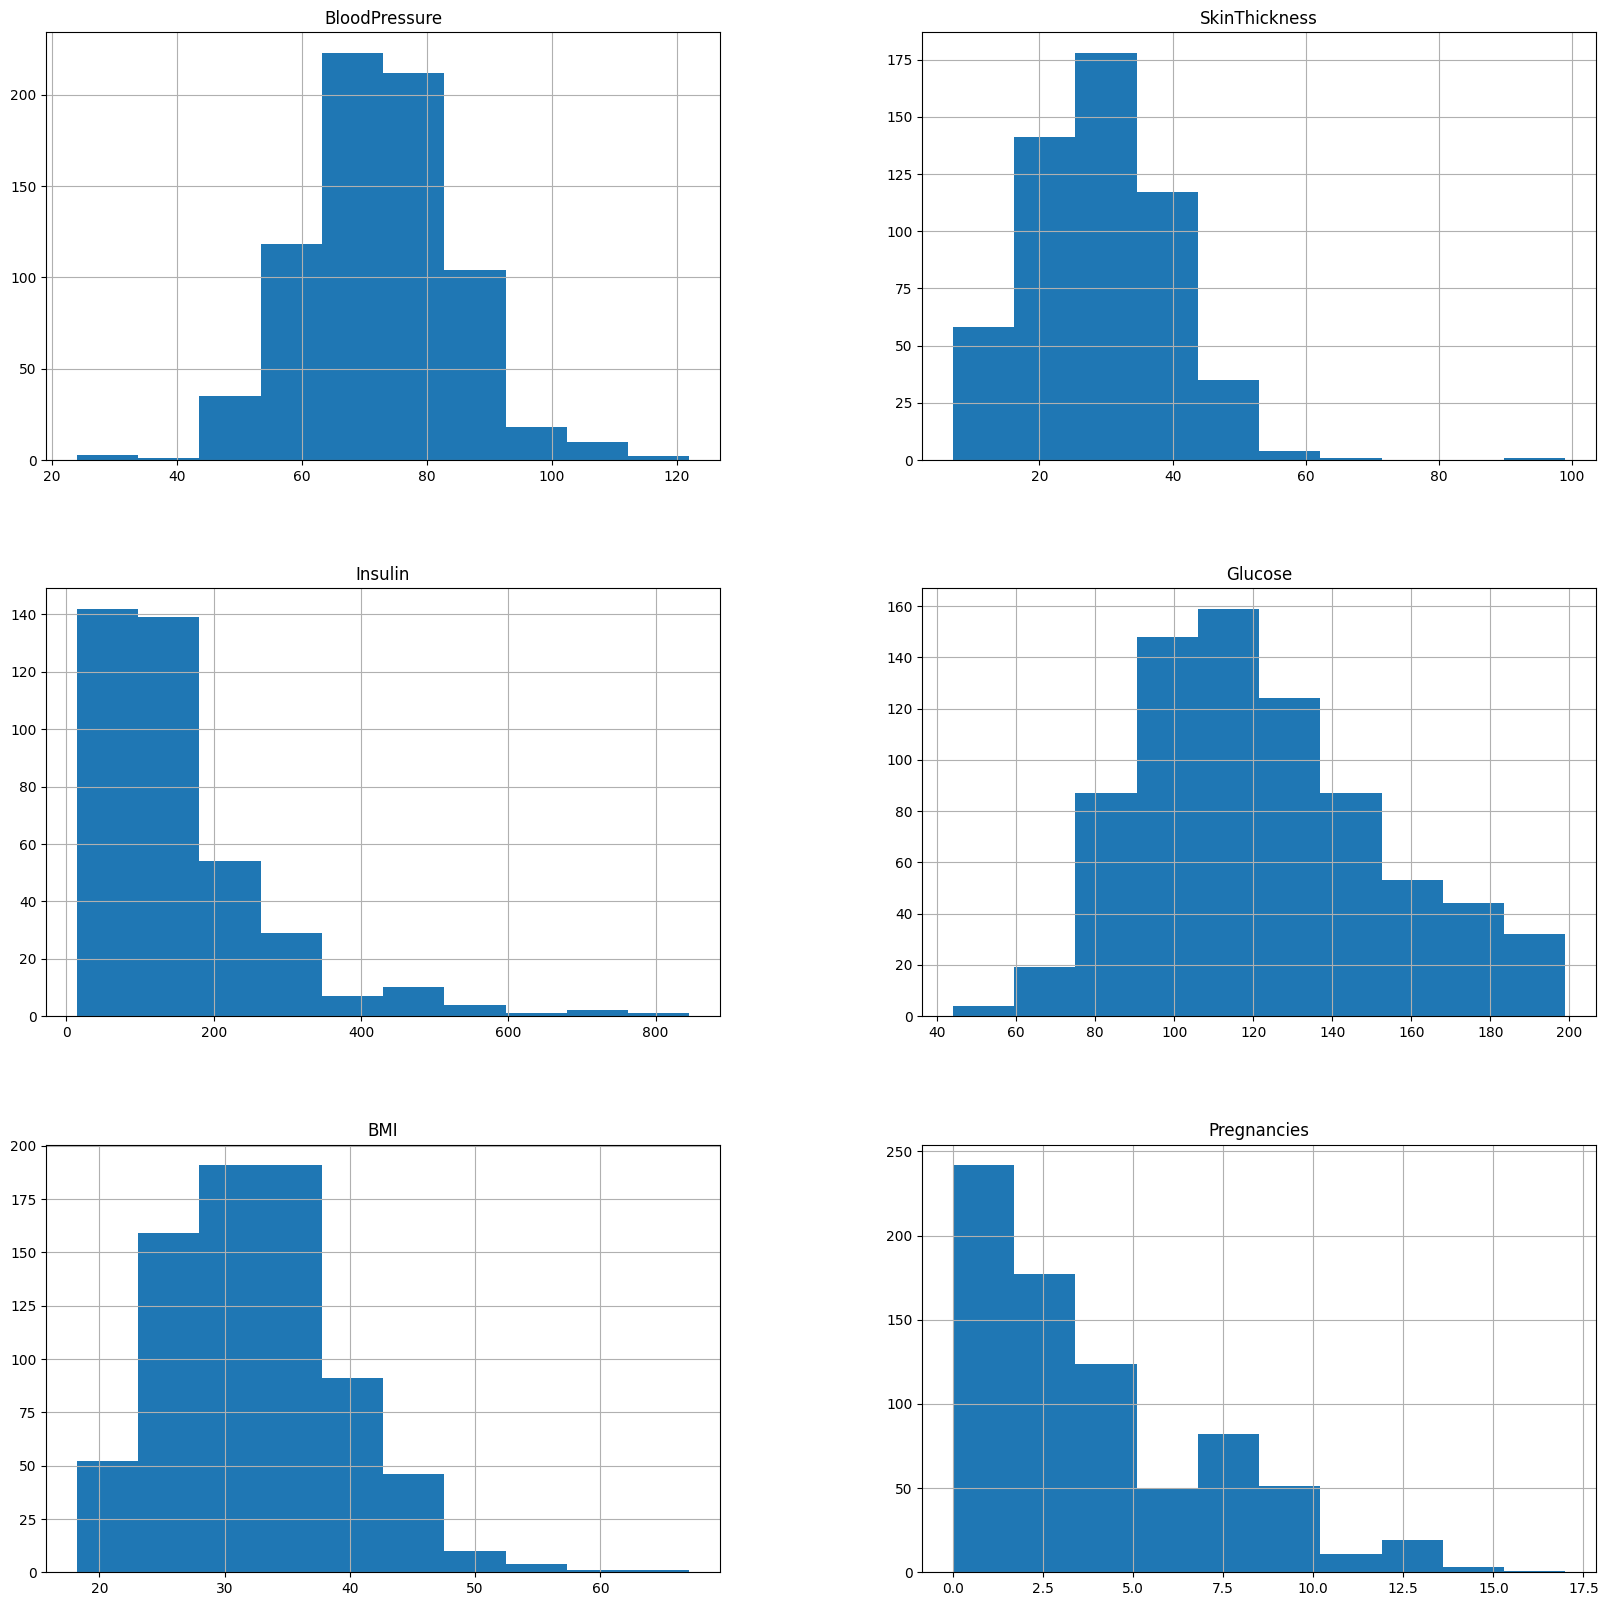

In [12]:
distribution_plot = data_copy[["BloodPressure","SkinThickness","Insulin","Glucose","BMI","Pregnancies"]].hist(figsize = (20,20))

#### Replacing NaN values
##### We are going to use the following imputation tactic for each of these columns: -

1.   Boxplot for each column
2.   If values in that column are forming a symmetrical distribution with less number of outliers, we use mean to impute the NaN values.
3.   If values in the column are forming a skewed distribution with large number of outliers, we use median to impute the NaN values.

##### A) BMI

<Axes: >

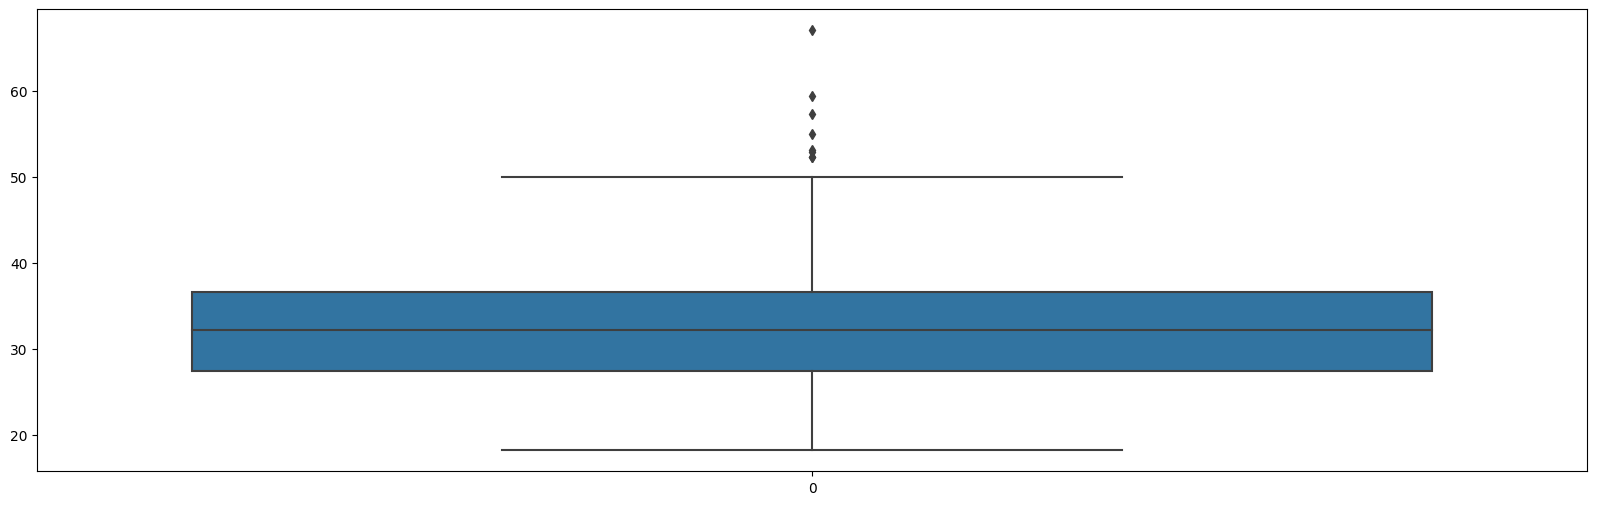

In [13]:
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(data_copy["BMI"])

##### Clearly the distribution is left-skewed, so we go with median imputation of NaN values

In [14]:
data_copy["BMI"].fillna(data_copy["BMI"].median(), inplace = True)

B) Glucose

<Axes: >

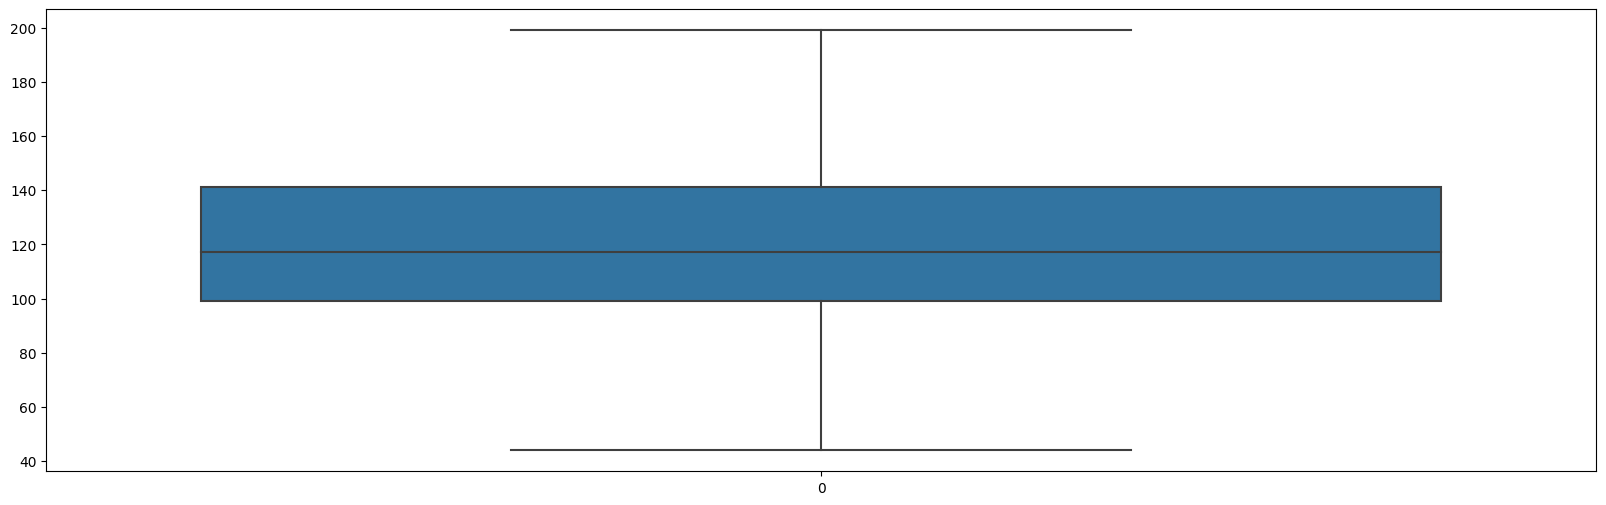

In [15]:
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(data_copy["Glucose"])

##### Clearly the distribution is symmetric, so we go with mean imputation of NaN values

In [16]:
data_copy["Glucose"].fillna(data_copy["Glucose"].mean(), inplace = True)

C) SkinThickness

<Axes: >

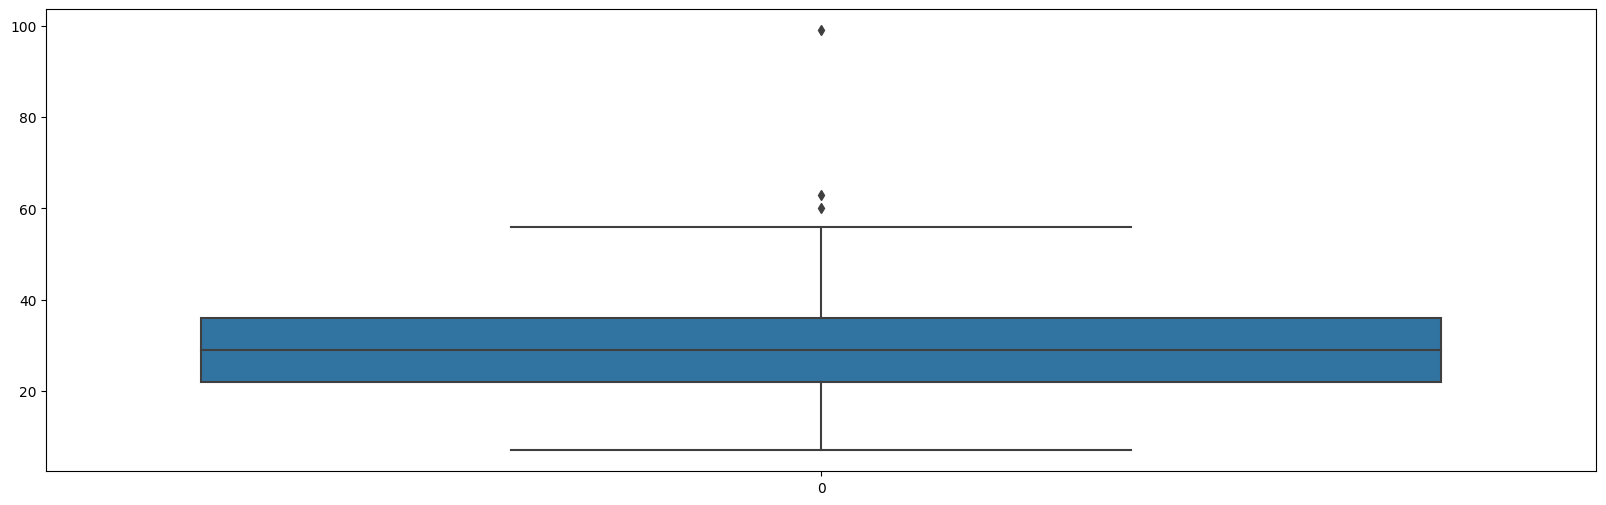

In [17]:
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(data_copy["SkinThickness"])

##### Clearly the distribution is left-skewed, so we go with median imputation of NaN values

In [18]:
data_copy["SkinThickness"].fillna(data_copy["SkinThickness"].median(), inplace = True)

D) Insulin

<Axes: >

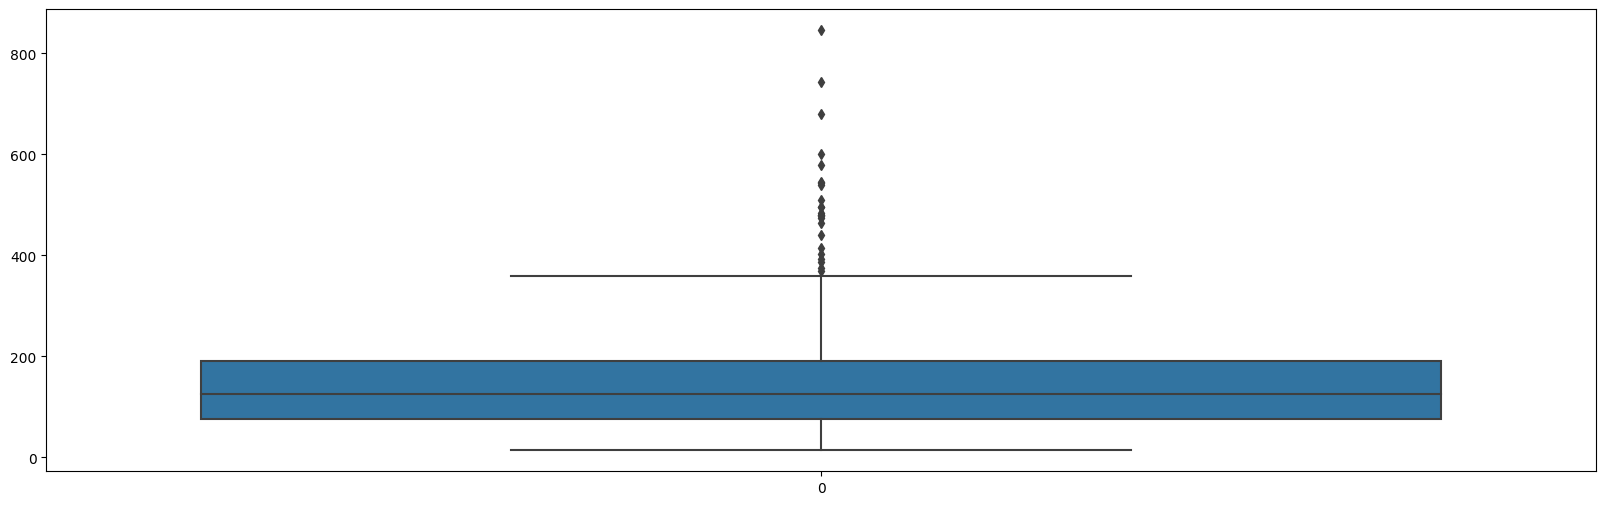

In [19]:
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(data_copy["Insulin"])

##### Clearly the distribution is left-skewed, so we go with median imputation of NaN values

In [20]:
data_copy["Insulin"].fillna(data_copy["Insulin"].median(), inplace = True)

E) BloodPressure

<Axes: >

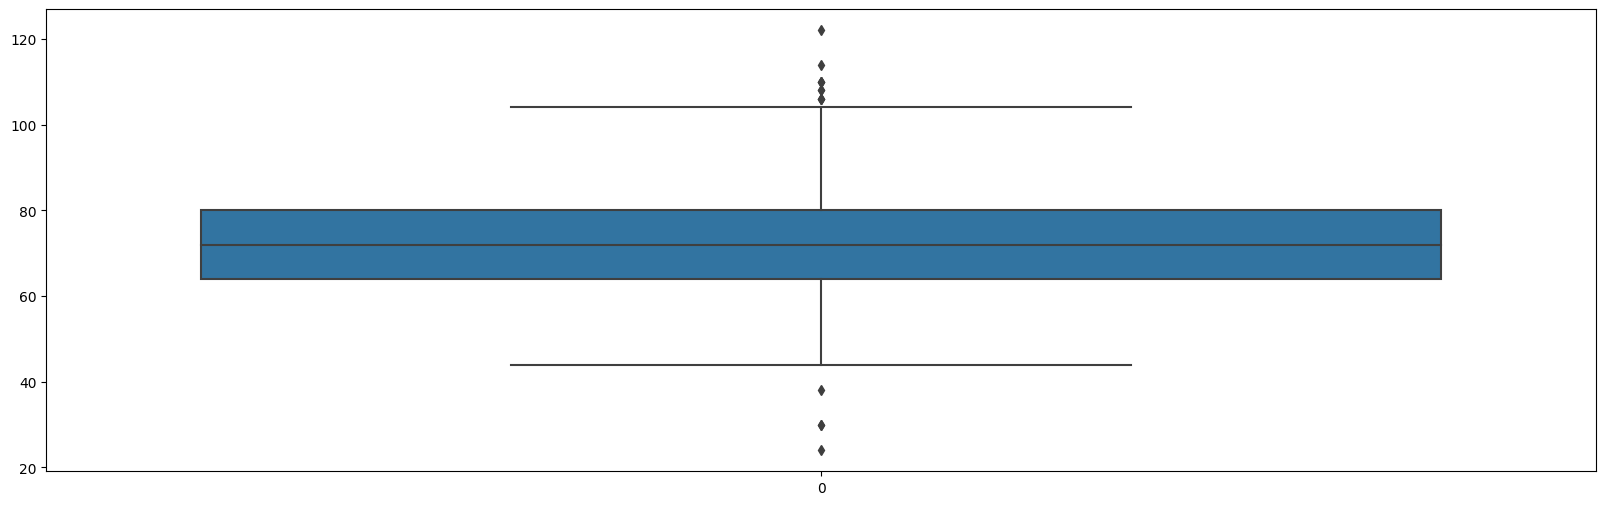

In [21]:
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(data_copy["BloodPressure"])

##### Clearly the distribution is symmetric, so we go with mean imputation of NaN values

In [22]:
data_copy["BloodPressure"].fillna(data_copy["BloodPressure"].mean(), inplace = True)

F) Pregnancies

<Axes: >

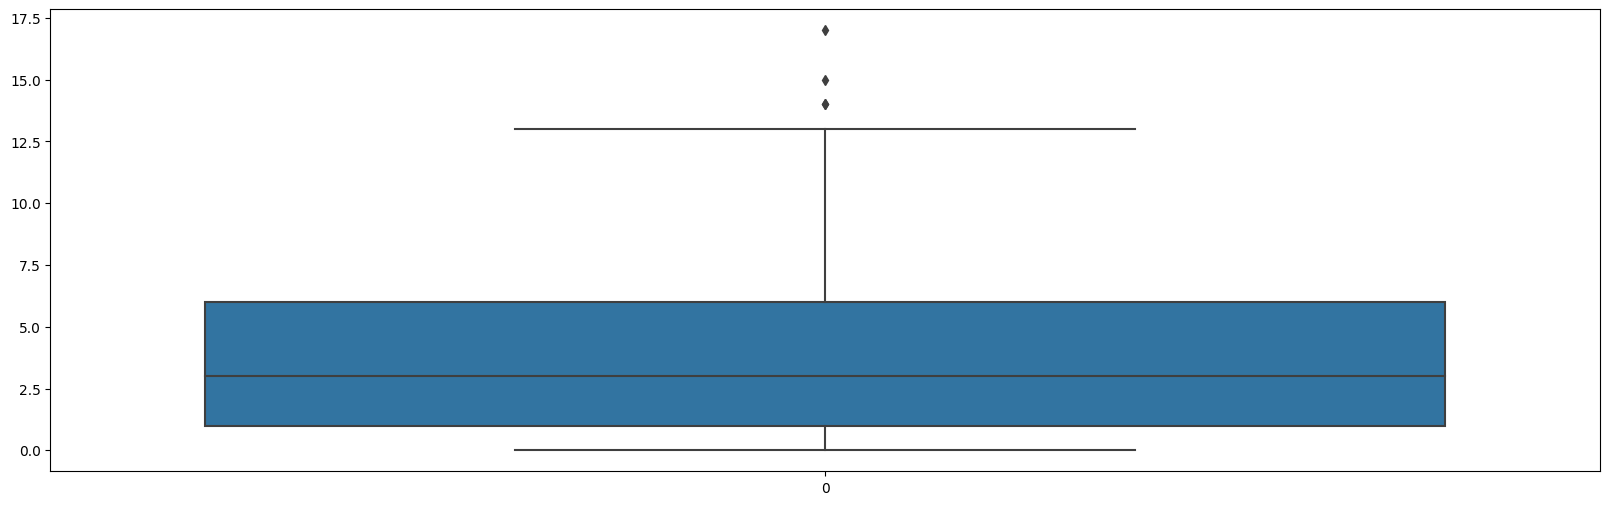

In [23]:
fig, ax = plt.subplots(figsize = (20,6))
sns.boxplot(data_copy["Pregnancies"])

##### Clearly the distribution is left-skewed, so we go with median imputation of NaN values

In [24]:
data_copy["Pregnancies"].fillna(data_copy["Pregnancies"].median(), inplace = True)

#### Plotting dataset after NaN imputation

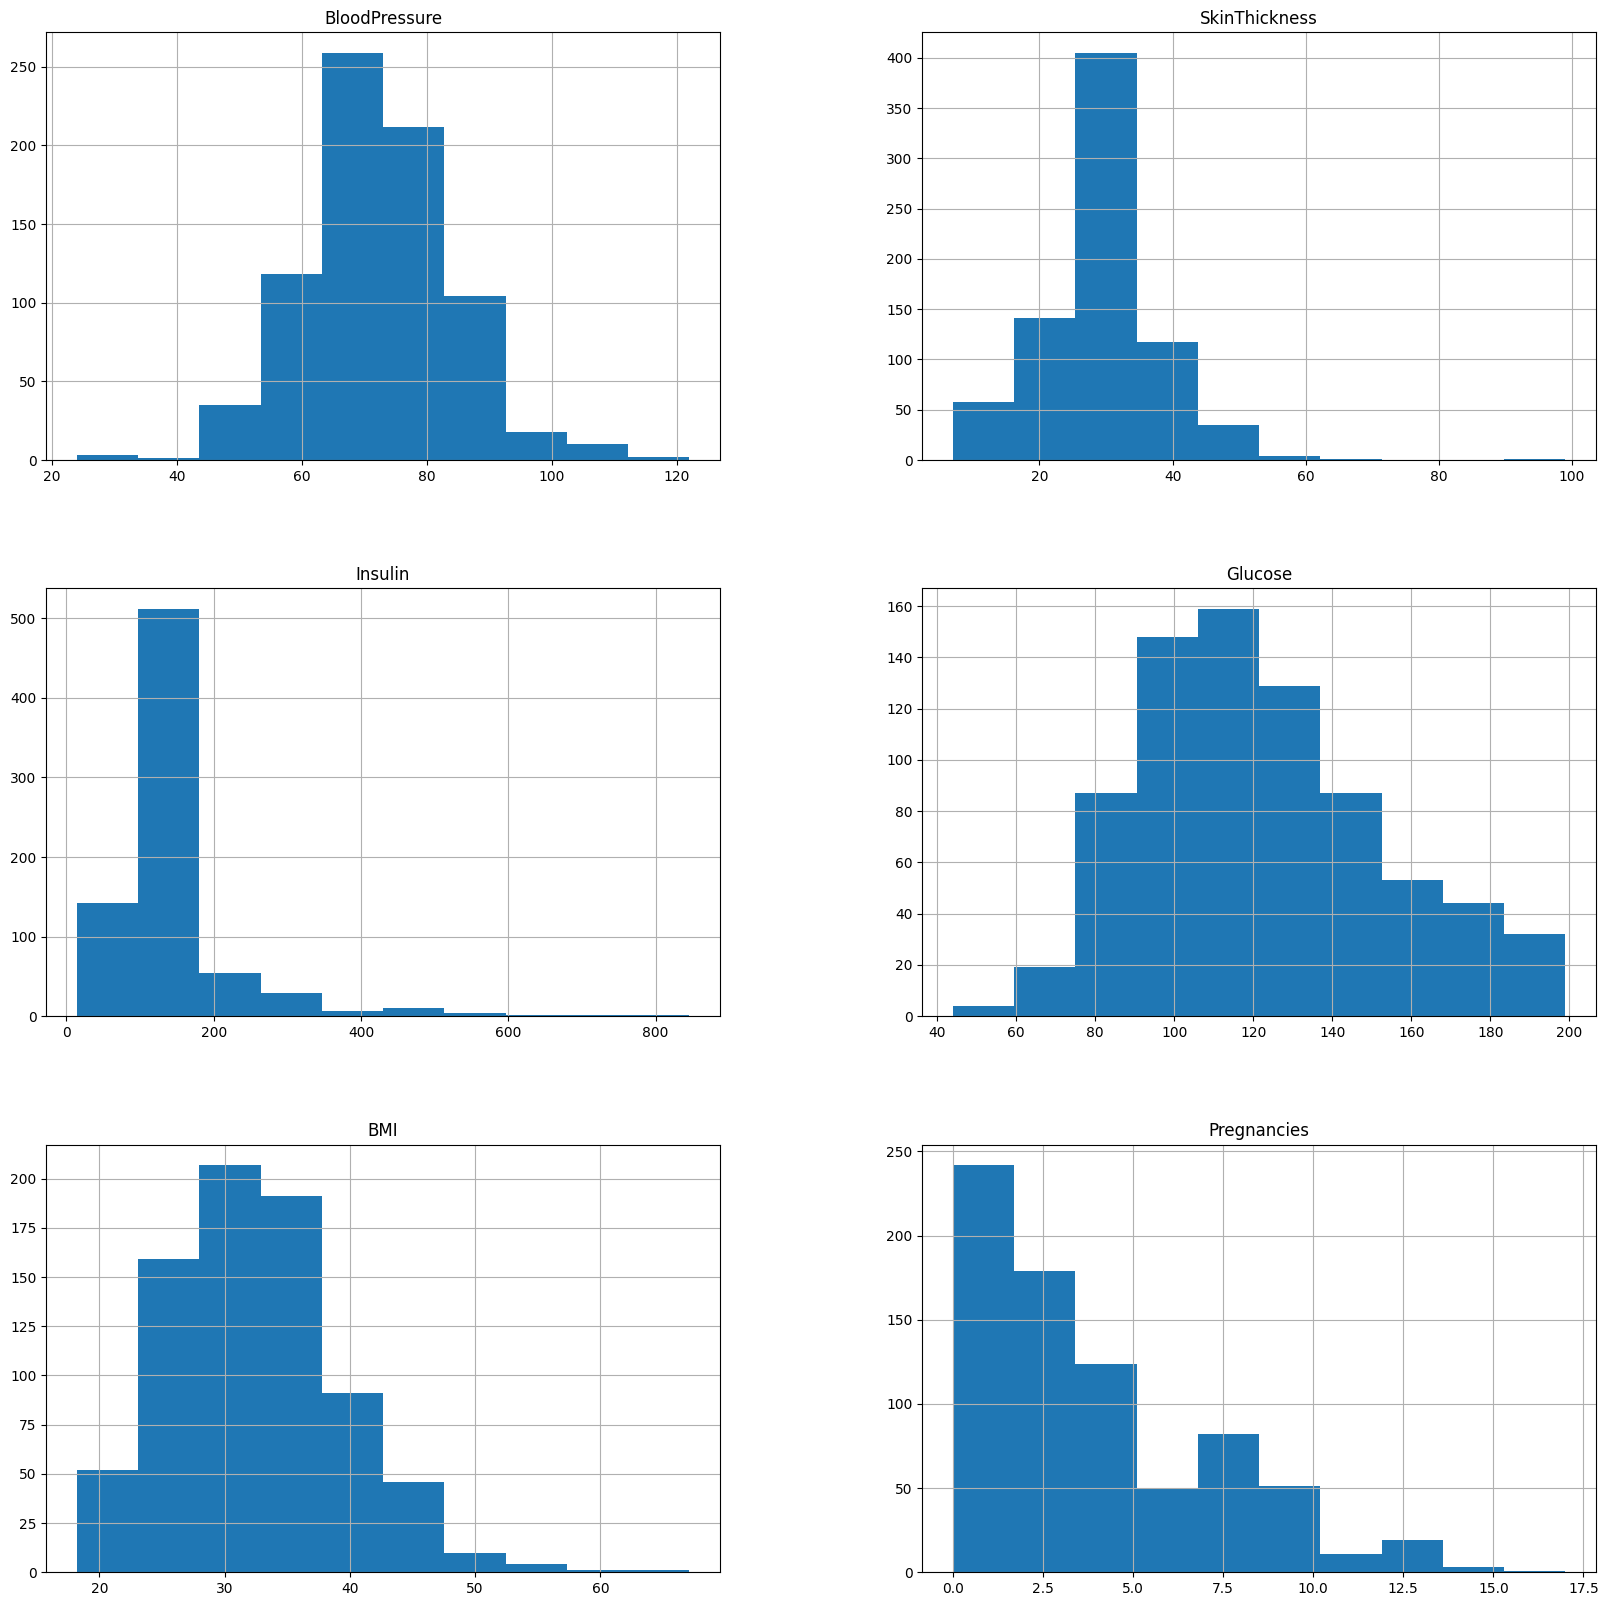

In [25]:
final_distribution_plot = data_copy[["BloodPressure","SkinThickness","Insulin","Glucose","BMI","Pregnancies"]].hist(figsize = (20,20))

In [26]:
print(data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Scaling the values in each column
##### This is an important step to do in KNN so that one feature with high values does not overwhelm the impact of a variable with low values

In [27]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
sc_X = StandardScaler()

# Apply the StandardScaler transformation to the data, dropping the "Outcome" column
X = data_copy.drop(["Outcome"], axis=1)
X = sc_X.fit_transform(X)

# Create a new DataFrame using the transformed data
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pd.DataFrame(X, columns=columns)


In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.638431,0.863428,-0.036649,0.672046,-0.180737,0.169545,0.481633,1.423063
1,-0.848380,-1.202588,-0.533975,-0.011512,-0.180737,-0.851286,-0.366286,-0.190210
2,1.233156,2.011215,-0.699750,-0.011512,-0.180737,-1.332535,0.619881,-0.105301
3,-0.848380,-1.071412,-0.533975,-0.695071,-0.538817,-0.632537,-0.931565,-1.039301
4,0.341069,-0.185977,0.129127,-0.011512,-0.180737,-0.997119,-0.827112,-0.275119


## kNN model and fitting data into the model
### Test-Train Split

In [29]:
y = data_copy["Outcome"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

print("X_train = {}, X_test = {}, y_train = {}, y_test = {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train = (508, 8), X_test = (254, 8), y_train = (508,), y_test = (254,)


### Create kNN model
#### We are using a class to house the kNN logic. For calculating the distance, we are using Euclidean Distance. However, using Minkowski or Mahalanobis Distance is also fine

In [30]:
class knnModel:

  def euclidean(self, v1, v2):
    # Calculate Euclidean distance between two vectors
    dist = np.sqrt(np.sum((v1-v2)**2))
    return dist
  
  def fit(self, X_train, y_train):
    # Store the training data
    self.X_train = np.array(X_train)
    self.y_train = np.array(y_train)
  
  def predict(self, X_test, k):
    predicted_outcomes = []

    # Reshape the test data if it has only one entry
    if(X_test.ndim == 1):
      X_test = np.reshape(X_test,(-1, len(X_test)))

    # Calculate distances between the test data and training data
    for test_entry in X_test:
      distances = np.array([self.euclidean(train_data_vector, test_entry) for train_data_vector in self.X_train])

      # Sort the distances and keep the first K datapoints
      dist = np.argsort(distances)[:k]

      # Get the labels of the K datapoints
      labels = self.y_train[dist]
        
      # Perform majority voting
      label = mode(labels)
      label = label.mode[0]
      predicted_outcomes.append(label)
    
    return predicted_outcomes
  
  def __init__(self):
    self.X_train = None
    self.y_train = None
  

### Fit and predict data on kNN model

In [31]:
knn = knnModel()
knn.fit(X_train, y_train)



In [32]:
for i in range(len(X_test)):
    x = np.array(X_test)[i]
    y = np.array(y_test)[i]
    predicted_val = knn.predict(x,10)
    print("Predicted Value = {}, Expected Value = {}".format(predicted_val, y))

/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


Predicted Value = [1], Expected Value = 0
Predicted Value = [1], Expected Value = 1
Predicted Value = [1], Expected Value = 1
Predicted Value = [0], Expected Value = 0
Predicted Value = [0], Expected Value = 0
Predicted Value = [0], Expected Value = 0
Predicted Value = [1], Expected Value = 1
Predicted Value = [0], Expected Value = 1
Predicted Value = [1], Expected Value = 1
Predicted Value = [0], Expected Value = 0
Predicted Value = [0], Expected Value = 0
Predicted Value = [0], Expected Value = 0
Predicted Value = [0], Expected Value = 0
Predicted Value = [1], Expected Value = 1
Predicted Value = [1], Expected Value = 1
Predicted Value = [1], Expected Value = 1
Predicted Value = [0], Expected Value = 1
Predicted Value = [1], Expected Value = 1
Predicted Value = [0], Expected Value = 0
Predicted Value = [1], Expected Value = 1
Predicted Value = [1], Expected Value = 0
Predicted Value = [0], Expected Value = 0
Predicted Value = [0], Expected Value = 0
Predicted Value = [0], Expected Va

#### Find optimal K-value for prediction

In [33]:
accuracy_scores = []
for k in range(1,20):
  predicted_vals = knn.predict(np.array(X_test), k)
  accuracy = accuracy_score(y_test, predicted_vals)
  accuracy_scores.append(accuracy)
  # report = classification_report(y_test, predicted_vals)
  print("For k = {}\n".format(k), accuracy)

/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 1
 0.7086614173228346


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 2
 0.7362204724409449


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 3
 0.7559055118110236


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 4
 0.7440944881889764


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 5
 0.7637795275590551


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 6
 0.7559055118110236


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 7
 0.7716535433070866


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 8
 0.7637795275590551


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 9
 0.7440944881889764


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 10
 0.7519685039370079


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 11
 0.7598425196850394


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 12
 0.7480314960629921


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 13
 0.7677165354330708


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 14
 0.7559055118110236


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 15
 0.7677165354330708


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 16
 0.7755905511811023


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 17
 0.7874015748031497


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 18
 0.7795275590551181


/tmp/ipykernel_23280/758816861.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = mode(labels)


For k = 19
 0.7716535433070866


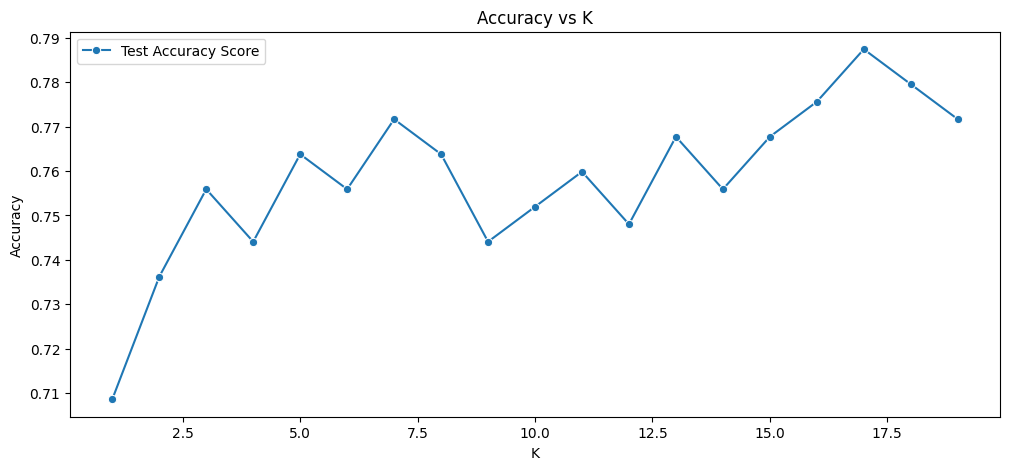

In [38]:
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1,20), y=accuracy_scores, marker='o', label='Test Accuracy Score')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()


### Hence, we have got a knn model with an optimum k value of 17 and accuracy = 78.74%